# Subjectivity Analysis

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/subjectivity](https://github.com/huseinzol05/Malaya/tree/master/example/subjectivity).
    
</div>

<div class="alert alert-info">

This module trained on both standard and local (included social media) language structures, so it is save to use for both.
    
</div>

In [1]:
%%time
import malaya

CPU times: user 6.34 s, sys: 1.25 s, total: 7.6 s
Wall time: 9.02 s


### Models accuracy

We use `sklearn.metrics.classification_report` for accuracy reporting, check at https://malaya.readthedocs.io/en/latest/models-accuracy.html#subjectivity-analysis

### labels supported

Default labels for subjectivity module.

In [2]:
malaya.subjectivity.label

['negative', 'positive']

### Explanation

Positive subjectivity: based on or influenced by personal feelings, tastes, or opinions. Can be a positive or negative sentiment.

Negative subjectivity: based on a report or a fact. Can be a positive or negative sentiment.

In [3]:
negative_text = 'Kerajaan negeri Kelantan mempersoalkan motif kenyataan Menteri Kewangan Lim Guan Eng yang hanya menyebut Kelantan penerima terbesar bantuan kewangan dari Kerajaan Persekutuan. Sedangkan menurut Timbalan Menteri Besarnya, Datuk Mohd Amar Nik Abdullah, negeri lain yang lebih maju dari Kelantan turut mendapat pembiayaan dan pinjaman.'
positive_text = 'kerajaan sebenarnya sangat bencikan rakyatnya, minyak naik dan segalanya'

string1 = 'Sis, students from overseas were brought back because they are not in their countries which is if something happens to them, its not the other countries’ responsibility. Student dalam malaysia ni dah dlm tggjawab kerajaan. Mana part yg tak faham?'
string2 = 'Harap kerajaan tak bukak serentak. Slowly release week by week. Focus on economy related industries dulu'
string3 = 'Idk if aku salah baca ke apa. Bayaran rm350 utk golongan umur 21 ke bawah shj ? Anyone? If 21 ke atas ok lah. If umur 21 ke bawah?  Are you serious? Siapa yg lebih byk komitmen? Aku hrp aku salah baca. Aku tk jumpa artikel tu'
string4 = 'Jabatan Penjara Malaysia diperuntukkan RM20 juta laksana program pembangunan Insan kepada banduan. Majikan yang menggaji bekas banduan, bekas penagih dadah diberi potongan cukai tambahan sehingga 2025.'

### Load multinomial model

```python
def multinomial(**kwargs):
    """
    Load multinomial emotion model.

    Returns
    -------
    result : malaya.model.ml.Bayes class
    """
```

In [3]:
model = malaya.subjectivity.multinomial()

#### Predict batch of strings

```python
def predict(self, strings: List[str], add_neutral: bool = True):
    """
    classify list of strings.

    Parameters
    ----------
    strings: List[str]
    add_neutral: bool, optional (default=True)
        if True, it will add neutral probability.

    Returns
    -------
    result: List[str]
    """
```

In [4]:
model.predict([positive_text,negative_text])

['neutral', 'negative']

Disable `neutral` probability,

In [5]:
model.predict([positive_text,negative_text], add_neutral = False)

['positive', 'negative']

#### Predict batch of strings with probability

```python
def predict_proba(self, strings: List[str], add_neutral: bool = True):
    """
    classify list of strings and return probability.

    Parameters
    ----------
    strings: List[str]
    add_neutral: bool, optional (default=True)
        if True, it will add neutral probability.

    Returns
    -------
    result: List[dict[str, float]]
    """
```

In [6]:
model.predict_proba([positive_text,negative_text], add_neutral = False)

[{'negative': 0.420659316666446, 'positive': 0.5793406833335559},
 {'negative': 0.7906212884104161, 'positive': 0.2093787115895868}]

### List available Transformer models

In [4]:
malaya.subjectivity.available_transformer()

,Size (MB),Quantized Size (MB),macro precision,macro recall,macro f1-score
bert,425.6,111.00,0.92004,0.91748,0.91663
tiny-bert,57.4,15.40,0.91023,0.90228,0.90301
albert,48.6,12.80,0.90544,0.90299,0.90300
tiny-albert,22.4,5.98,0.89457,0.89469,0.89461
xlnet,446.6,118.00,0.91916,0.91753,0.91761
alxlnet,46.8,13.30,0.90862,0.90835,0.90817
fastformer,458.0,116.00,0.80785,0.81973,0.80758
tiny-fastformer,77.3,19.70,0.87147,0.87147,0.87105


### Load Transformer model

All model interface will follow sklearn interface started v3.4,

```python
def transformer(model: str = 'bert', quantized: bool = False, **kwargs):
    """
    Load Transformer subjectivity model.

    Parameters
    ----------
    model : str, optional (default='bert')
        Model architecture supported. Allowed values:

        * ``'bert'`` - Google BERT BASE parameters.
        * ``'tiny-bert'`` - Google BERT TINY parameters.
        * ``'albert'`` - Google ALBERT BASE parameters.
        * ``'tiny-albert'`` - Google ALBERT TINY parameters.
        * ``'xlnet'`` - Google XLNET BASE parameters.
        * ``'alxlnet'`` - Malaya ALXLNET BASE parameters.
        * ``'fastformer'`` - FastFormer BASE parameters.
        * ``'tiny-fastformer'`` - FastFormer TINY parameters.

    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model.
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result: model
        List of model classes:

        * if `bert` in model, will return `malaya.model.bert.BinaryBERT`.
        * if `xlnet` in model, will return `malaya.model.xlnet.BinaryXLNET`.
        * if `fastformer` in model, will return `malaya.model.fastformer.BinaryFastFormer`.
    """
```

In [5]:
model = malaya.subjectivity.transformer(model = 'albert')

101%|██████████| 49.0/48.6 [00:35<00:00, 1.39MB/s]
184%|██████████| 1.00/0.54 [00:02<-1:59:59, 2.83s/MB]
135%|██████████| 1.00/0.74 [00:03<00:00, 3.73s/MB]


### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [14]:
quantized_model = malaya.subjectivity.transformer(model = 'albert', quantized = True)

INFO:tensorflow:loading sentence piece model


INFO:tensorflow:loading sentence piece model


#### Predict batch of strings

```python
def predict(self, strings: List[str], add_neutral: bool = True):
    """
    classify list of strings.

    Parameters
    ----------
    strings: List[str]
    add_neutral: bool, optional (default=True)
        if True, it will add neutral probability.

    Returns
    -------
    result: List[str]
    """
```

In [15]:
model.predict([negative_text, positive_text])

['negative', 'negative']

In [17]:
quantized_model.predict([negative_text, positive_text])

['negative', 'negative']

#### Predict batch of strings with probability

```python
def predict_proba(self, strings: List[str], add_neutral: bool = True):
    """
    classify list of strings and return probability.

    Parameters
    ----------
    strings: List[str]
    add_neutral: bool, optional (default=True)
        if True, it will add neutral probability.

    Returns
    -------
    result: List[dict[str, float]]
    """
```

In [18]:
model.predict_proba([negative_text, positive_text])

[{'negative': 0.9956738, 'positive': 4.326162e-05, 'neutral': 0.0042829514},
 {'negative': 0.9615872, 'positive': 0.00038412912, 'neutral': 0.038028657}]

In [16]:
quantized_model.predict_proba([negative_text, positive_text])

[{'negative': 0.9954784, 'positive': 4.521673e-05, 'neutral': 0.0044763684},
 {'negative': 0.9612684, 'positive': 0.00038731584, 'neutral': 0.038344264}]

#### Open subjectivity visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

```python
def predict_words(
    self,
    string: str,
    method: str = 'last',
    bins_size: float = 0.05,
    visualization: bool = True,
):
    """
    classify words.

    Parameters
    ----------
    string : str
    method : str, optional (default='last')
        Attention layer supported. Allowed values:

        * ``'last'`` - attention from last layer.
        * ``'first'`` - attention from first layer.
        * ``'mean'`` - average attentions from all layers.
    bins_size: float, optional (default=0.05)
        default bins size for word distribution histogram.
    visualization: bool, optional (default=True)
        If True, it will open the visualization dashboard.

    Returns
    -------
    dictionary: results
    """
```


In [6]:
model.predict_words(negative_text)

### Vectorize

Let say you want to visualize sentence / word level in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, strings: List[str], method: str = 'first'):
    """
    vectorize list of strings.

    Parameters
    ----------
    strings: List[str]
    method : str, optional (default='first')
        Vectorization layer supported. Allowed values:

        * ``'last'`` - vector from last sequence.
        * ``'first'`` - vector from first sequence.
        * ``'mean'`` - average vectors from all sequences.
        * ``'word'`` - average vectors based on tokens.

    Returns
    -------
    result: np.array
    """
```

#### Sentence level

In [8]:
texts = [negative_text, positive_text, string1, string2]
r = quantized_model.vectorize(texts, method = 'first')

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE().fit_transform(r)
tsne.shape

(4, 2)

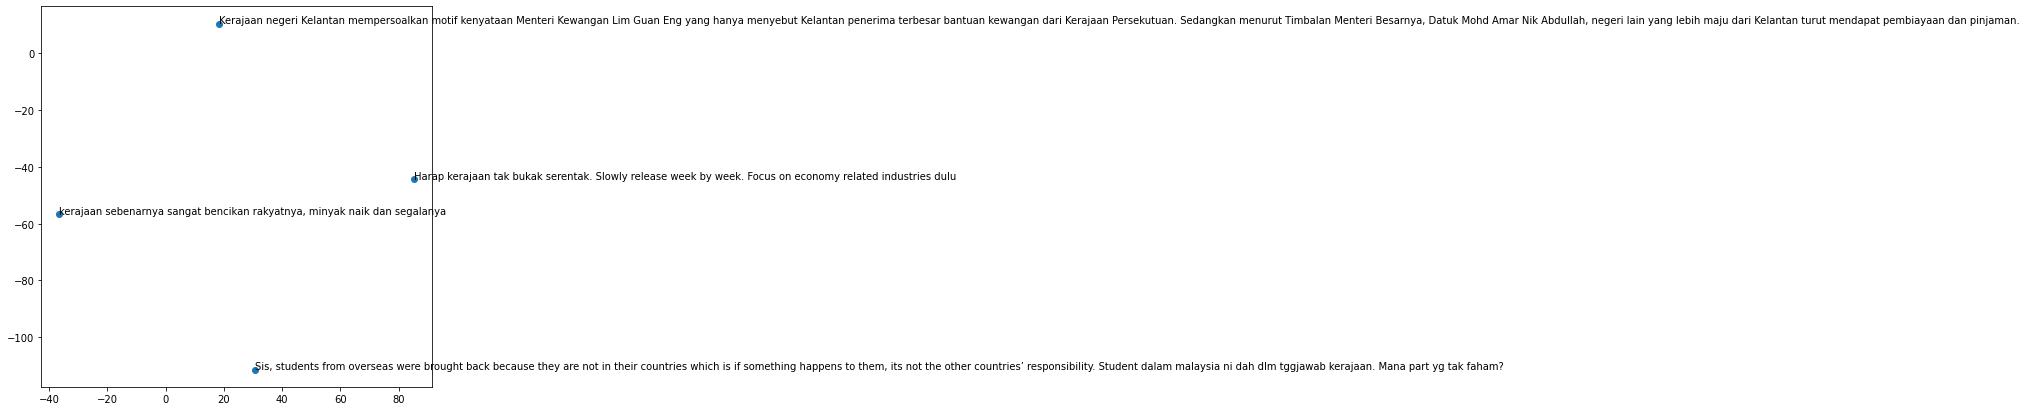

In [11]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = texts
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

#### Word level

In [12]:
r = quantized_model.vectorize(texts, method = 'word')

In [13]:
x, y = [], []
for row in r:
    x.extend([i[0] for i in row])
    y.extend([i[1] for i in row])

In [14]:
tsne = TSNE().fit_transform(y)
tsne.shape

(109, 2)

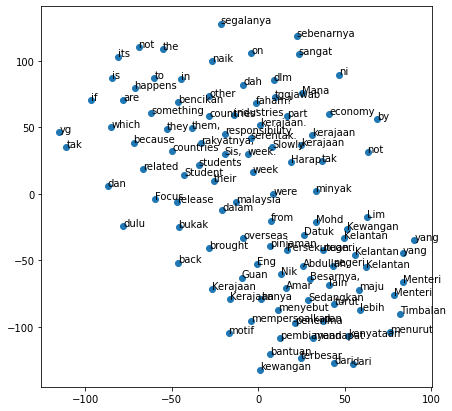

In [15]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = x
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

Pretty good, the model able to know cluster top side as positive subjectivity, bottom side as negative subjectivity.

### Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [6]:
multinomial = malaya.subjectivity.multinomial()
alxlnet = malaya.subjectivity.transformer(model = 'alxlnet')

In [12]:
malaya.stack.predict_stack([multinomial, model, alxlnet], [positive_text])

[{'negative': 0.19735892950073536,
  'positive': 0.003119166818228667,
  'neutral': 0.1160071232668102}]

In [13]:
malaya.stack.predict_stack([multinomial, model, alxlnet], [positive_text], add_neutral = False)

[{'negative': 0.7424157666636825, 'positive': 0.04498033797670938}]